In [10]:
import pandas
import numpy as np


In [11]:
?pandas.DataFrame

Init signature:
pandas.DataFrame(
    data=None,
    index:Union[Collection, NoneType]=None,
    columns:Union[Collection, NoneType]=None,
    dtype:Union[_ForwardRef('ExtensionDtype'), str, numpy.dtype, Type[Union[str, float, int, complex]], NoneType]=None,
    copy:bool=False,
)
Docstring:     
Two-dimensional, size-mutable, potentially heterogeneous tabular data.

Data structure also contains labeled axes (rows and columns).
Arithmetic operations align on both row and column labels. Can be
thought of as a dict-like container for Series objects. The primary
pandas data structure.

Parameters
----------
data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
    Dict can contain Series, arrays, constants, or list-like objects.

    .. versionchanged:: 0.23.0
       If data is a dict, column order follows insertion-order for
       Python 3.6 and later.

    .. versionchanged:: 0.25.0
       If data is a list of dicts, column order follows insertion-order
       for Py

In [54]:
n_years = 10
data = np.zeros([n_years,3])
data[:,0] = range(2000, 2000+n_years)
for i in range(n_years):
    data[i,1] = i + np.random.exponential()
    data[i,2] = 10.0/(1.0+i) + np.random.exponential()

In [55]:
df = pandas.DataFrame(data,
                    columns=['year', 'incidents', 'volume'])

<AxesSubplot:>

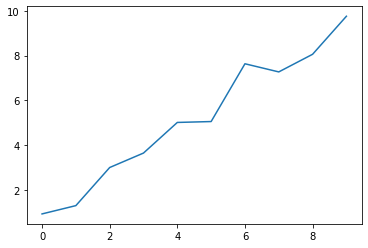

In [60]:
df['incidents'].plot()

<AxesSubplot:>

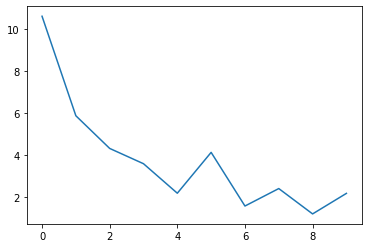

In [61]:
df['volume'].plot()

In [62]:
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfd.distributions

ModuleNotFoundError: No module named 'tensorflow_probability'